# Business Understanding

The objective of this project was to be able to identify using Convolution Neural Networks (CNN) whether a patient has pneumonia or not using a downsampled chest x-ray dataset obtained from Kaggle. 

Subsequently the data obtained from this set will be used to produce a CNN using Keras by taking it through the systematic process of instantiating a sequential Model, compiling the model, and fitting the model.

In [81]:
#Importing the usual suspects

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Activation, Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array

import os, shutil
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics 

from keras.optimizers import SGD
import datetime

# Import

In [82]:
#Checking file path of our downsampled dataset

print(os.listdir('../dsc-mod-4-project-v2-1-solo/Data/chest_xray'))
print(os.listdir('../dsc-mod-4-project-v2-1-solo/Data/chest_xray/test'))
print(os.listdir('../dsc-mod-4-project-v2-1-solo/Data/chest_xray/train'))
print(os.listdir('../dsc-mod-4-project-v2-1-solo/Data/chest_xray/val'))

['test', 'chest_xray', '__MACOSX', 'train', 'val']
['PNEUMONIA', 'NORMAL']
['PNEUMONIA', 'NORMAL']
['PNEUMONIA', 'NORMAL']


In [83]:
#Reassign suitable variable names to our directories

train_dir = '../dsc-mod-4-project-v2-1-solo/Data/chest_xray/train'
test_dir = '../dsc-mod-4-project-v2-1-solo/Data/chest_xray/test'
val_dir = '../dsc-mod-4-project-v2-1-solo/Data/chest_xray/val'

# Loading Images

NORMAL


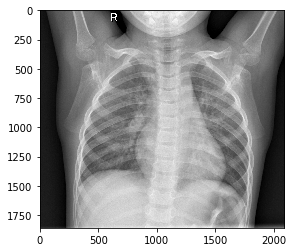

In [84]:
#We want to investigate what is in the directory and print images of normal scans and a pneumonia scan

img_name = 'IM-0115-0001.jpeg'
img_normal = load_img('../dsc-mod-4-project-v2-1-solo/Data/chest_xray/train/NORMAL/' + img_name)

print('NORMAL')
plt.imshow(img_normal)
plt.show()

PNEUMONIA


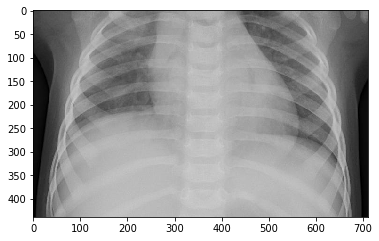

In [85]:
#Producing a scan of an individual with pneumonia

img_name_2 = 'person1_bacteria_1.jpeg'
img_pneumonia = load_img('../dsc-mod-4-project-v2-1-solo/Data/chest_xray/train/PNEUMONIA/' + img_name_2)

print('PNEUMONIA')
plt.imshow(img_pneumonia)
plt.show()

Having loaded the two images we can see that our images need rescaling

In [117]:
#Rescaling our images 

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_dir, 
                                                   #rescaling images to 150x150
                                                   target_size=(150,150),
                                                   batch_size=32, class_mode='binary')


validation_generator = val_datagen.flow_from_directory(val_dir, 
                                                        target_size=(150,150), 
                                                       batch_size=32, class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                        target_size=(150,150), 
                                                       batch_size=624, class_mode='binary')



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Baseline Model

I plan to produce the Baseline Model now with 4 layers and have 32 nodes. 

I will make the activation function relu. 

The last activation function will be a sigmoid due to the fact our problem is a binary classification problem.

In [40]:
#Instantiating a sequential model
model = models.Sequential()

#Adding a convolutional layer and making the activation function relu
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))

#Adding a pooling layer
model.add(layers.MaxPooling2D((2,2)))

#Adding a third convolutional layer
model.add(layers.Conv2D(64, (3,3), activation='relu'))

#Adding a second pooling layer
model.add(layers.MaxPooling2D((2,2)))

#Adding a fourth convolutional layer
model.add(layers.Conv2D(128, (3,3), activation='relu'))

#Adding a third pooling layer
model.add(layers.MaxPooling2D((2,2)))

#Adding a fifth convolutional layer
model.add(layers.Conv2D(128, (3,3), activation='relu'))

#Adding a fourth pooling layer
model.add(layers.MaxPooling2D((2,2)))

#Adding a Dense layer
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))
        

In [107]:
from keras import optimizers

#Compiling the model
#The loss function is binary_crossentropy as it is a binary classifier problem


model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [104]:
#We are going to print a summary of our model

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 128)       147584    
__________

## Training and Evaluation of the Model

In [42]:
#Time to fit the the model
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=5, 
                              validation_data=validation_generator, validation_steps=50)

Epoch 1/5
100/100 [==============================] - 347s 3s/step - loss: 0.4439 - acc: 0.7956 - val_loss: 0.8093 - val_acc: 0.6250
Epoch 2/5
100/100 [==============================] - 335s 3s/step - loss: 0.2549 - acc: 0.8953 - val_loss: 0.7432 - val_acc: 0.6250
Epoch 3/5
100/100 [==============================] - 370s 4s/step - loss: 0.1709 - acc: 0.9319 - val_loss: 0.3672 - val_acc: 0.8750
Epoch 4/5
100/100 [==============================] - 249s 2s/step - loss: 0.1341 - acc: 0.9478 - val_loss: 0.4404 - val_acc: 0.8125
Epoch 5/5
100/100 [==============================] - 150s 2s/step - loss: 0.1154 - acc: 0.9566 - val_loss: 0.2486 - val_acc: 0.9375


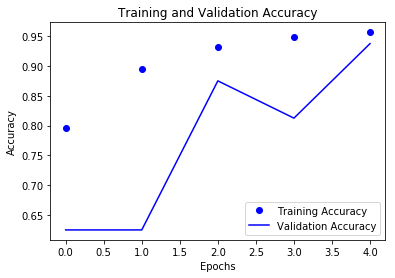

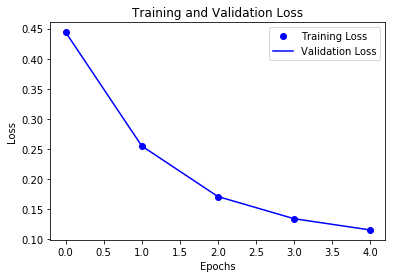

In [114]:
#Setting up our variables to produce our training accuracy and loss graphs

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_los = history.history['val_loss']
epochs = range(len(acc))

#Visualising the training and validation

#Training and Validation Accuracy

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

#Training and Validation Losses
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The epochs have been limited to a low number due to limitations and exhaustive computational requirements of producing CNN models. We can see a validation accuracy of near 93.75%.

# Second Model 

In [29]:
#Instantiating a sequential model
model_2 = models.Sequential()

#Adding a convolutional layer
model_2.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))

#Adding a pooling layer
model_2.add(layers.MaxPooling2D((2,2)))

#Adding a second convolutional layer
model_2.add(layers.Conv2D(64, (3,3), activation='relu'))

#Adding a second pooling layer
model_2.add(layers.MaxPooling2D((2,2)))

#Adding a third convolutional layer
model_2.add(layers.Conv2D(128, (3,3), activation='relu'))

#Adding a third pooling layer
model_2.add(layers.MaxPooling2D((2,2)))

#Adding a flattening layer
model_2.add(layers.Flatten())

#Adding a dense layer
model_2.add(layers.Dense(512, activation='relu'))

model_2.add(layers.Dense(1, activation='sigmoid'))

In [105]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)             0         
__________

In [31]:
#Compiling the model
model_2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

#Fitting the model
history_2 = model_2.fit_generator(train_generator, steps_per_epoch=100, epochs=5, 
                              validation_data=validation_generator, validation_steps=50)

Epoch 1/5
100/100 [==============================] - 327s 3s/step - loss: 0.3985 - acc: 0.8250 - val_loss: 0.6796 - val_acc: 0.6250
Epoch 2/5
100/100 [==============================] - 333s 3s/step - loss: 0.1683 - acc: 0.9369 - val_loss: 0.6168 - val_acc: 0.6875
Epoch 3/5
100/100 [==============================] - 309s 3s/step - loss: 0.1297 - acc: 0.9484 - val_loss: 1.0668 - val_acc: 0.6250
Epoch 4/5
100/100 [==============================] - 191s 2s/step - loss: 0.1047 - acc: 0.9634 - val_loss: 0.2595 - val_acc: 0.9375
Epoch 5/5
100/100 [==============================] - 159s 2s/step - loss: 0.0891 - acc: 0.9681 - val_loss: 0.3003 - val_acc: 0.9375


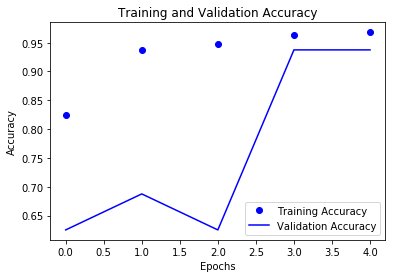

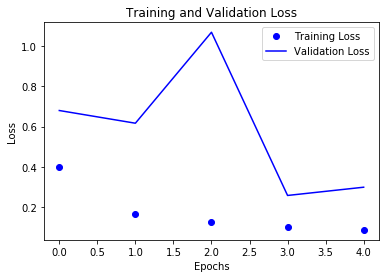

In [115]:
#Preparing our variables to produce our second training loss and accuracy plots

acc_2 = history_2.history['acc']
val_acc_2 = history_2.history['val_acc']
loss_2 = history_2.history['loss']
val_los_2 = history_2.history['val_loss']
epochs_2 = range(len(acc_2))

#Visualising the training and validation

#Training and Validation Accuracy

plt.plot(epochs_2, acc_2, 'bo', label='Training Accuracy')
plt.plot(epochs_2, val_acc_2, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

#Training and Validation Losses
plt.plot(epochs_2, loss_2, 'bo', label='Training Loss')
plt.plot(epochs_2, val_los_2, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We can see similarly see our second model has also produced an accuracy of 93.75%

# Hyperparameter Tuning and Third Model

In [39]:
#Instantiating the model
model_3 = models.Sequential()

#Adding the first convolutional layer
model_3.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))

#Adding first pooling layer
model_3.add(layers.MaxPooling2D((2,2)))

#Adding the second convolutional layer
model_3.add(layers.Conv2D(64, (3,3), activation='relu'))

#Adding the second pooling layer
model_3.add(layers.MaxPooling2D((2,2)))

#Adding the third convolutional layer
model_3.add(layers.Conv2D(128, (3,3), activation='relu'))

#Adding the third pooling layer
model_3.add(layers.MaxPooling2D((2,2)))

#Adding the fourth convolutional layer          
model_3.add(layers.Conv2D(128, (3,3), activation='relu'))

#Adding the fourth pooling layer
model_3.add(layers.MaxPooling2D((2,2)))

#Adding the flattening layer
model_3.add(layers.Flatten())

#Adding the dense layer
model_3.add(layers.Dense(512, activation='relu'))

model_3.add(layers.Dense(1, activation='sigmoid'))

#compiling our model and this time change the optimiser to Adam
model_3.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['acc'])

In [106]:
#print out our parameters

model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [44]:
#fitting our model

history_3 = model_3.fit_generator(train_generator, steps_per_epoch=100, epochs=10, 
                              validation_data=validation_generator, validation_steps=50)

Epoch 1/10
100/100 [==============================] - 159s 2s/step - loss: 0.3834 - acc: 0.8350 - val_loss: 0.6581 - val_acc: 0.7500
Epoch 2/10
100/100 [==============================] - 229s 2s/step - loss: 0.1389 - acc: 0.9469 - val_loss: 0.4816 - val_acc: 0.7500
Epoch 3/10
100/100 [==============================] - 229s 2s/step - loss: 0.1182 - acc: 0.9531 - val_loss: 0.4312 - val_acc: 0.8125
Epoch 4/10
100/100 [==============================] - 225s 2s/step - loss: 0.0938 - acc: 0.9681 - val_loss: 0.2425 - val_acc: 0.8125
Epoch 5/10
100/100 [==============================] - 214s 2s/step - loss: 0.0835 - acc: 0.9712 - val_loss: 0.3058 - val_acc: 0.8125
Epoch 6/10
100/100 [==============================] - 206s 2s/step - loss: 0.0682 - acc: 0.9762 - val_loss: 0.1361 - val_acc: 0.8750
Epoch 7/10
100/100 [==============================] - 205s 2s/step - loss: 0.0593 - acc: 0.9809 - val_loss: 0.6712 - val_acc: 0.6875
Epoch 8/10
100/100 [==============================] - 215s 2s/step - 

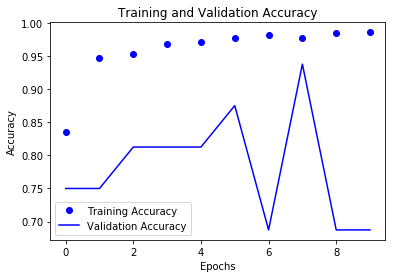

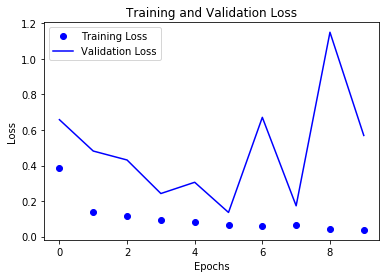

In [116]:
#Preparing our variables for our third training loss and accuracy plots

acc_3 = history_3.history['acc']
val_acc_3 = history_3.history['val_acc']
loss_3 = history_3.history['loss']
val_los_3 = history_3.history['val_loss']
epochs_3 = range(len(acc_3))

#Visualising the training and validation

#Training and Validation Accuracy

plt.plot(epochs_3, acc_3, 'bo', label='Training Accuracy')
plt.plot(epochs_3, val_acc_3, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

#Training and Validation Losses
plt.plot(epochs_3, loss_3, 'bo', label='Training Loss')
plt.plot(epochs_3, val_los_3, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We have only produced an accuracy of 68.75%. This is not sufficient for use as our best model

# Evaluation of Final Model

In [118]:
#the next function will return the next item in the iterator

test_images, test_labels = next(test_generator)

In [126]:
#We will go with a threshold frequency of 0.5

predictions = model.predict_generator(generator=test_generator)
y_pred = (predictions>0.5).astype(int)
y_test = test_labels
class_names = test_generator.class_indices.keys()

class_names

dict_keys(['NORMAL', 'PNEUMONIA'])

In [124]:
#We are going to produce the confusion matrix

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[ 30, 204],
       [ 88, 302]])

These values have given us our values of our:

True Positive, TP: 30 - We identified individuals who we thought had pneumonia and they did

FP, False Positive: 204 - We identified individuals who we thought had pneumonia, but they didn't

FN, False Negative: 88 - We thought the listed individuals did not have pneumonia, and they did. This is the most particular useful metric from this confusion matrix as we want to produce actionable solutions to prevent mistreatment or no treatment at all for that particular patient.

TN, True Negative: 30 - Our model has correctly identified the listed individuals to have pneumonia. Therefore business as usual. 

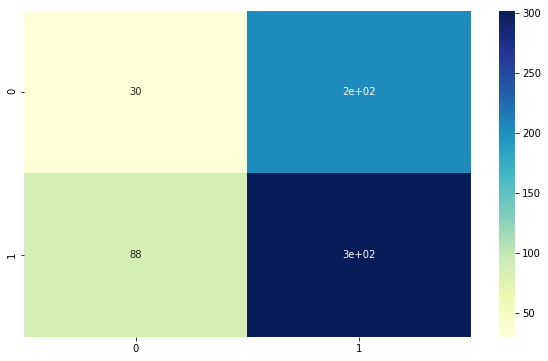

In [125]:
#We want to make the confusion matrix more visually appealing 

import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cnf_matrix, cmap='YlGnBu', annot=True)
plt.show()

In [119]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score



acc = metrics.accuracy_score(test_labels, y_pred)
f1 = metrics.f1_score(test_labels, y_pred)
recall = metrics.recall_score(test_labels, y_pred)
precision = metrics.precision_score(test_labels, y_pred)
print (f"Accuracy: {round(acc,3)}")
print (f"F1 Score: {round(f1,3)}")
print (f"Recall: {round(recall, 3)}")
print (f"Precision: {round(precision,3)}")

Accuracy: 0.583
F1 Score: 0.71
Recall: 0.815
Precision: 0.628


Our accuracy score has told us the overall testing accuracy of the model. At 58.3% this is not very accurate. For the future it would help to choose a model that has more layers, and select greater hyperparameters. 

Our recall of 81.5% suggests that in our TPR of all the people with pneumonia, how many people did the model identify them accurately to have pneumonia. This is a good reading, however, we are more concerned with the actual False Negatives as they are likely to be more costly to health of a patient.

Our precision score of 62.8% suggests of all the times the model made a prediction that a person had pneumonia, how many times did they actually have pneumonia. 